<a href="https://colab.research.google.com/github/sayantan16/Deep-Learning-Sample-Images/blob/main/01_Neural_Network_Regression_with_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in TensorFlow

Out of the many definations of regression problem, we are taking a simple one: Predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [ ]:
# Import TensorFlow

import tensorflow as tf
print(tf.__version__)

2.12.0


## Creating a data to view and fit

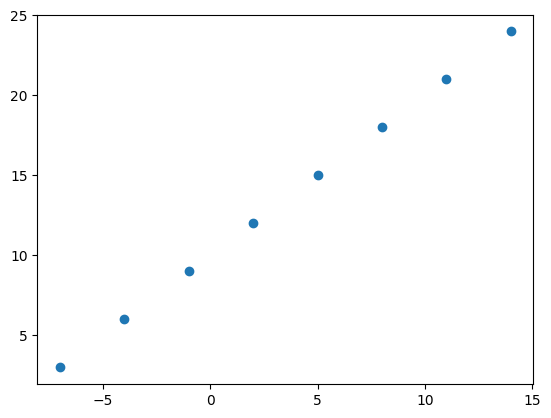

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output Shapes

In [ ]:
# Create a demo tensor for the Housing Price prediction problem

house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X.shape
output_shape = y.shape

input_shape, output_shape

((8,), (8,))

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

((), ())

In [ ]:
X[0].ndim, y[0].ndim

(0, 0)

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
# Turn our numpy arrays to tensors

X = tf.constant(X)
y = tf.constant(y)

X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape

input_shape, output_shape

(TensorShape([]), TensorShape([]))

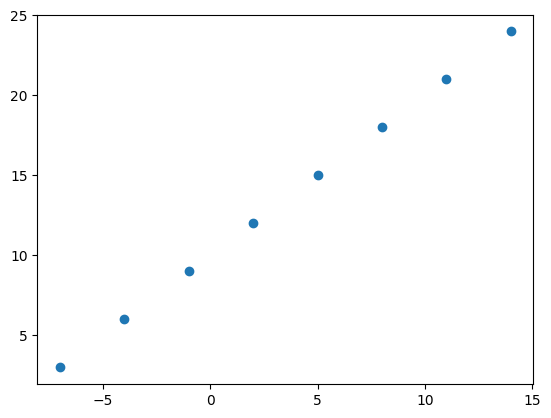

In [ ]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model
2. **Compiling a model** - define the loss function (in other words, the function that tells our model how wrong it is) and Optimizer - tells our model how to improve the pattern and its learning and the Evaluation Matrix - what we can use to interpret the performance of our model
5. **Fitting a model** - letting a model try to find patterns between X and y (features and labels)

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model

# mae - mean absolute error
# SGD - stochastic gradient descent
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics = ["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=20)

Epoch 1/20
1/1 [==============================] - 1s 923ms/step - loss: 8.0630 - mae: 8.0630
Epoch 2/20
1/1 [==============================] - 0s 21ms/step - loss: 7.9305 - mae: 7.9305
Epoch 3/20
1/1 [==============================] - 0s 41ms/step - loss: 7.7980 - mae: 7.7980
Epoch 4/20
1/1 [==============================] - 0s 20ms/step - loss: 7.6655 - mae: 7.6655
Epoch 5/20
1/1 [==============================] - 0s 18ms/step - loss: 7.5330 - mae: 7.5330
Epoch 6/20
1/1 [==============================] - 0s 21ms/step - loss: 7.4625 - mae: 7.4625
Epoch 7/20
1/1 [==============================] - 0s 10ms/step - loss: 7.4569 - mae: 7.4569
Epoch 8/20
1/1 [==============================] - 0s 32ms/step - loss: 7.4512 - mae: 7.4512
Epoch 9/20
1/1 [==============================] - 0s 18ms/step - loss: 7.4456 - mae: 7.4456
Epoch 10/20
1/1 [==============================] - 0s 18ms/step - loss: 7.4400 - mae: 7.4400
Epoch 11/20
1/1 [==============================] - 0s 26ms/step - loss: 7.4344

In [ ]:
# Check out X and y

X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Try and make a prediction using our model

y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 165ms/step


array([[29.54592]], dtype=float32)

## Improving the Model

We can improve the model by altering the steps to create the model:

1. **Creating the model** - here we might add more layers,
 increase the number of hidden units/neurons within each of the hidden layers, change activation of each layer.
2. **Compiling the model** - here we might change the optimization function or perhaps the learning rate of the optimization function.
3. **Fitting the model** - here we might fit a model for more epochs (leave it training for longer) or on more data (give the model more example to learn from).

In [ ]:
# Rebuilding the model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (training the model longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 8.7641 - mae: 8.7641
Epoch 2/100
1/1 [==============================] - 0s 44ms/step - loss: 8.6316 - mae: 8.6316
Epoch 3/100
1/1 [==============================] - 0s 26ms/step - loss: 8.4991 - mae: 8.4991
Epoch 4/100
1/1 [==============================] - 0s 26ms/step - loss: 8.3666 - mae: 8.3666
Epoch 5/100
1/1 [==============================] - 0s 27ms/step - loss: 8.2341 - mae: 8.2341
Epoch 6/100
1/1 [==============================] - 0s 23ms/step - loss: 8.1016 - mae: 8.1016
Epoch 7/100
1/1 [==============================] - 0s 27ms/step - loss: 7.9691 - mae: 7.9691
Epoch 8/100
1/1 [==============================] - 0s 32ms/step - loss: 7.8366 - mae: 7.8366
Epoch 9/100
1/1 [==============================] - 0s 39ms/step - loss: 7.7041 - mae: 7.7041
Epoch 10/100
1/1 [==============================] - 0s 29ms/step - loss: 7.5716 - mae: 7.5716
Epoch 11/100
1/1 [==============================] - 0s 31ms/step - loss

In [ ]:
# New prediction

y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 192ms/step


array([[30.325579]], dtype=float32)

In [ ]:
# Rebuilding the model
# Adding a hidden layer

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (training the model longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 453ms/step - loss: 14.3571 - mae: 14.3571
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 13.7029 - mae: 13.7029
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 13.0691 - mae: 13.0691
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 12.4325 - mae: 12.4325
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 11.7927 - mae: 11.7927
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 11.1556 - mae: 11.1556
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 10.5021 - mae: 10.5021
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 9.8271 - mae: 9.8271
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 9.1255 - mae: 9.1255
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 8.3905 - mae: 8.3905
Epoch 11/100
1/1 [==============================] - 0s 

In [ ]:
# New prediction

y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 73ms/step


array([[32.53681]], dtype=float32)

In [ ]:
# Rebuilding the model
# Adding a hidden layer

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.001),
              metrics=["mae"])

# 3. Fit the model (training the model longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 609ms/step - loss: 13.6391 - mae: 13.6391
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 13.5692 - mae: 13.5692
Epoch 3/100
1/1 [==============================] - 0s 11ms/step - loss: 13.4993 - mae: 13.4993
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 13.4294 - mae: 13.4294
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 13.3595 - mae: 13.3595
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 13.2896 - mae: 13.2896
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 13.2197 - mae: 13.2197
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 13.1498 - mae: 13.1498
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 13.0799 - mae: 13.0799
Epoch 10/100
1/1 [==============================] - 0s 9ms/step - loss: 13.0099 - mae: 13.0099
Epoch 11/100
1/1 [==============================] -

In [ ]:
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 73ms/step


array([[31.821371]], dtype=float32)

In [ ]:
# Rebuilding the model
# Adding a hidden layer

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.00001),
              metrics=["mae"])

# 3. Fit the model (training the model longer)
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 12.9019 - mae: 12.9019
Epoch 2/100
1/1 [==============================] - 0s 11ms/step - loss: 10.5296 - mae: 10.5296
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 7.8779 - mae: 7.8779
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 9.2920 - mae: 9.2920
Epoch 5/100
1/1 [==============================] - 0s 10ms/step - loss: 9.3872 - mae: 9.3872
Epoch 6/100
1/1 [==============================] - 0s 12ms/step - loss: 7.9938 - mae: 7.9938
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 7.2026 - mae: 7.2026
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 7.8330 - mae: 7.8330
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 8.1579 - mae: 8.1579
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 8.0574 - mae: 8.0574
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - lo

In [ ]:
y_pred = model.predict([17.0])
y_pred

1/1 [==============================] - 0s 164ms/step


array([[25.895903]], dtype=float32)

## Evaluating a Model

In practice, the typical workflow to go through when building a neural network is:

```
Build a model  -> Fit it -> Evaluate it -> Tweak the model -> Fit it -> Evaluate it -> Tweak the model -> ....
```

* The data - what does it look like?
* The model - what does the model look like?
* The training - how does the model perform while it learns?
* The predictions - how do the predictions line up against the original labels?

In [ ]:
# Make a bigger data set

X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Making the dataset/labels

y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

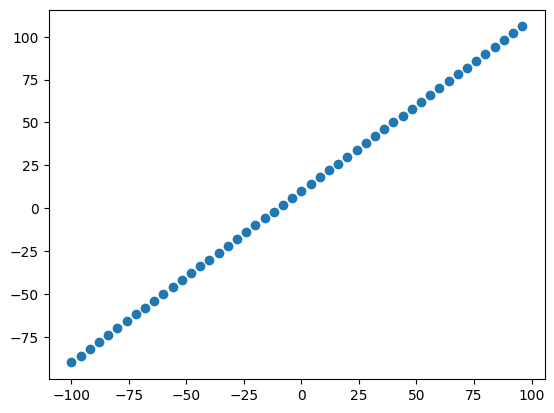

In [ ]:
# Visualize the data

plt.scatter(X, y)

### The Three Sets ...

* **Training Set** - Model learns from this data, which is typically 70-80% of the total data that is available
* **Validation Set** - The model gets turned into this data, which is typically 10-15% of the data available
* **Test Set** -  The model gets evaluated in this data, to test what it has learned, this set is typically 10-15% of the total data available.


In [ ]:
# Check the length of how many samples we have

len(X)

50

In [ ]:
# Split the data into train and test set

X_train = X[:40] # First 40 are training samples (80%)
y_train = y[:40]

X_test = X[40:] # Last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data
 Since the data is now divided into training and test set, visualizing the sets

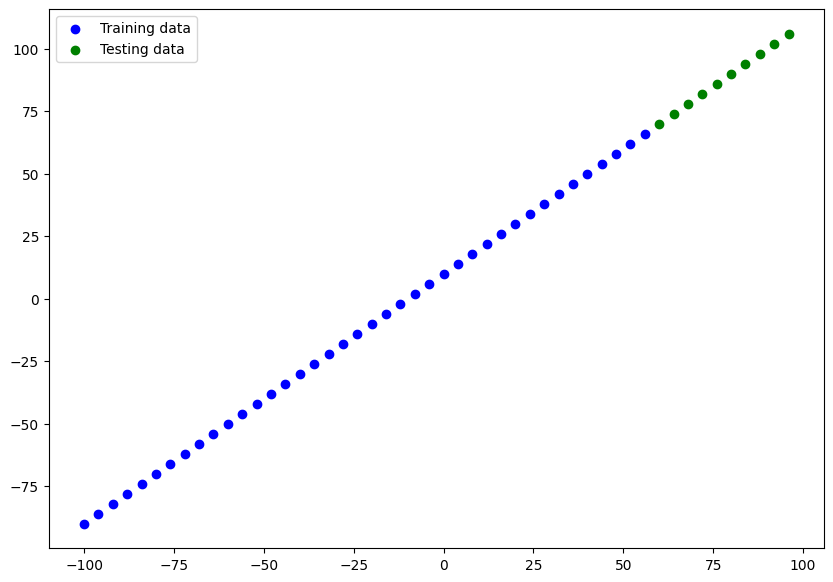

In [ ]:
plt.figure(figsize=(10, 7))

# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")

# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")

# Show a Legend
plt.legend();

In [ ]:
# Building the model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (training the model longer)
# model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

# **Visualizing the model:**

In [ ]:
# Creating a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, input_shape=[1], name="input_layer_1"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="Model_1")

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:
model.summary()

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer_1 (Dense)       (None, 50)                100       
                                                                 
 output_layer (Dense)        (None, 1)                 51        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model
* Trainable params - these are the parameters(patterns) the model can update as it trains
* Non-Trainable params -  these parameters aren't updated during the training (this is typical when you bring in already learned patterns or parameters from other models during **transfer learning**)

In [ ]:
# Lets fit the model to the training data

model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [ ]:
# Get the summary of the model

model.summary()

Model: "Model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer_1 (Dense)       (None, 50)                100       
                                                                 
 output_layer (Dense)        (None, 1)                 51        
                                                                 
Total params: 151
Trainable params: 151
Non-trainable params: 0
_________________________________________________________________


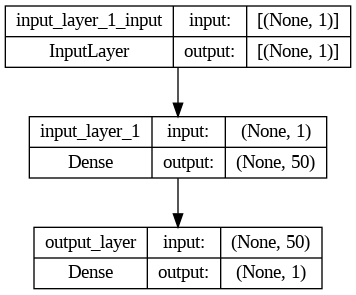

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing the model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often, it is seen in the form if `y_test` or `y_true` versus `y_pred` (ground truth versus the model's predictions)

In [ ]:
# Make some predictions

y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 63ms/step


array([[ 78.33111 ],
       [ 83.4345  ],
       [ 88.537895],
       [ 93.6413  ],
       [ 98.7447  ],
       [103.84808 ],
       [108.951485],
       [114.05488 ],
       [119.15827 ],
       [124.26168 ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# Lets create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels
  """
  plt.figure(figsize=(10, 7))

  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training Data")

  # Plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing Data")

  # Plot model's prediction in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")

  # Show the legend
  plt.legend();

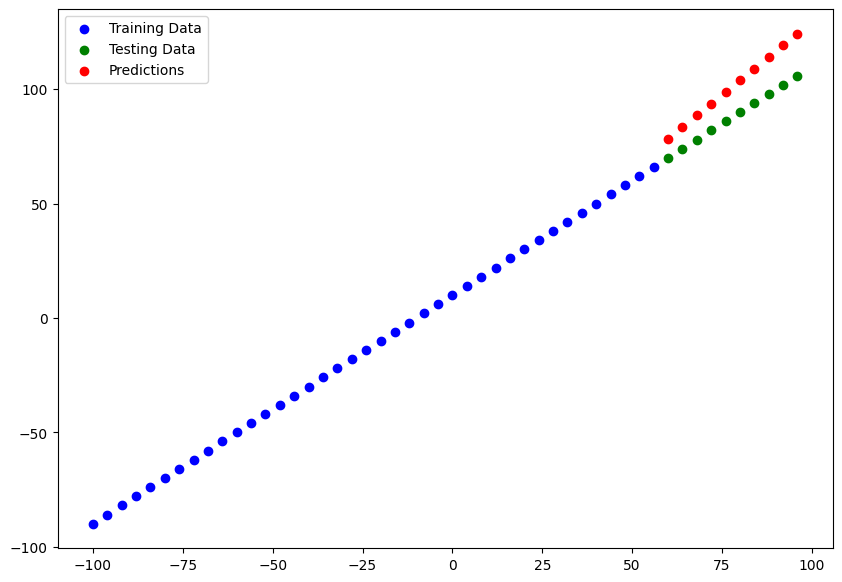

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### Evaluatiing our model's predictions using regression evaluation metrics

Depending on the problem, there will be different evaluation metrics to evaluate the model's performance.

Since we're working on a regression problem, the two main metrics:

* MAE - Mean Absolute Error, an average how wrong each of my model's prediction is
* MSE - Mean Square Error, square the average errors

In [ ]:
# Evaluate the model on the train set

model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 147ms/step - loss: 13.2964 - mae: 13.2964


[13.296392440795898, 13.296392440795898]

In [ ]:
# Calculate the mean absolute error

mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(tf.constant(y_pred)))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=13.29639>

In [ ]:
# Calculate the mean square error

mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(tf.constant(y_pred)))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=186.83823>

In [ ]:
# Functionize the use of MAE and MSE

def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(tf.constant(y_pred)))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=tf.squeeze(tf.constant(y_pred)))

# Running experiments to improve the model

1. Get more data - get more examples for the model to train on
2. Make the model larger - using more complex model, with more layers or hidden units in each layer.
3. Train for longer - give the model more chance to find the pattern in the data.

Three modelling experiments:
1. `model_1` - same as the original model.
2. `model_2` - two layers
3. `model_3` - two layers but 500 epochs

### Model_1 Experiment:

In [ ]:
# Creating a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
], name="Model_1")

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Lets fit the model to the training data
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

1/1 [==============================] - 0s 54ms/step


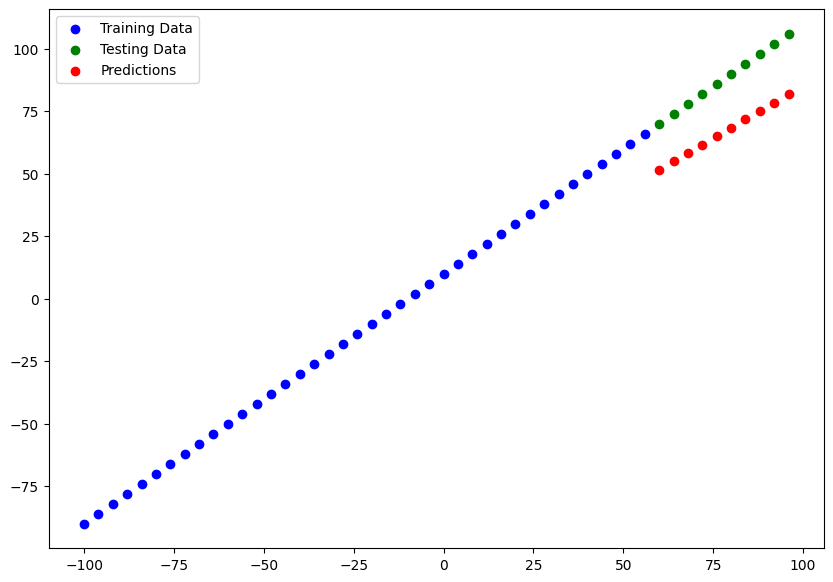

In [ ]:
# Make and Plot predictions for Model_1

# Make some predictions
y_pred_1 = model_1.predict(X_test)

# Plotting the predictions
plot_predictions(predictions=y_pred_1)

In [ ]:
# Evaluate predictions using the metrics for Model_1

mae_1 = mae(y_test, y_pred_1)
mse_1 = mse(y_test, y_pred_1)

mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=21.310787>,
 <tf.Tensor: shape=(), dtype=float32, numpy=457.5984>)

### Model_2 Experiment:

In [ ]:
# Creating a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
], name="Model_2")

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mse"])

# 3. Lets fit the model to the training data
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

1/1 [==============================] - 0s 61ms/step


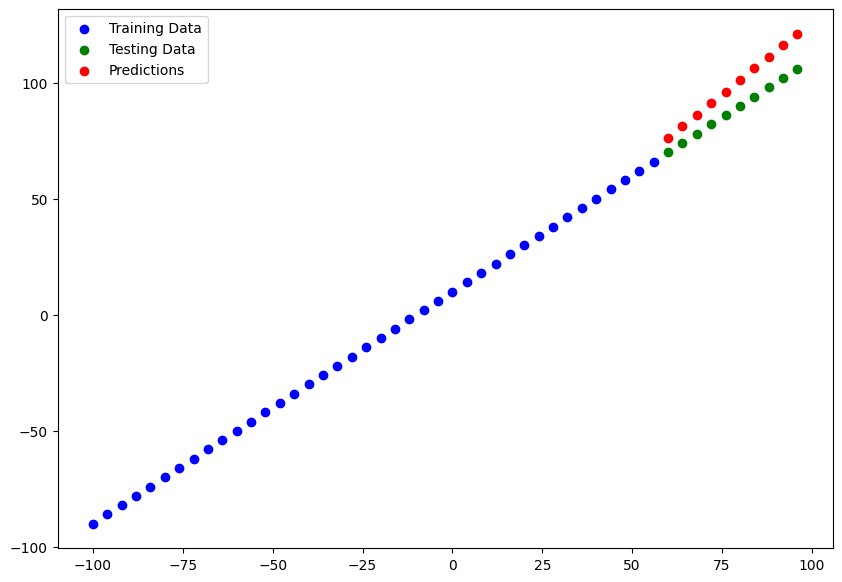

In [ ]:
# Make and Plot predictions for Model_2

# Make some predictions
y_pred_2 = model_2.predict(X_test)

# Plotting the predictions
plot_predictions(predictions=y_pred_2)

In [ ]:
# Evaluate predictions using the metrics for Model_2

mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)

mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=10.690886>,
 <tf.Tensor: shape=(), dtype=float32, numpy=122.11815>)

### Model_3 Experiment:

In [ ]:
# Creating a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
], name="Model_3")

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Lets fit the model to the training data
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0)

1/1 [==============================] - 0s 55ms/step


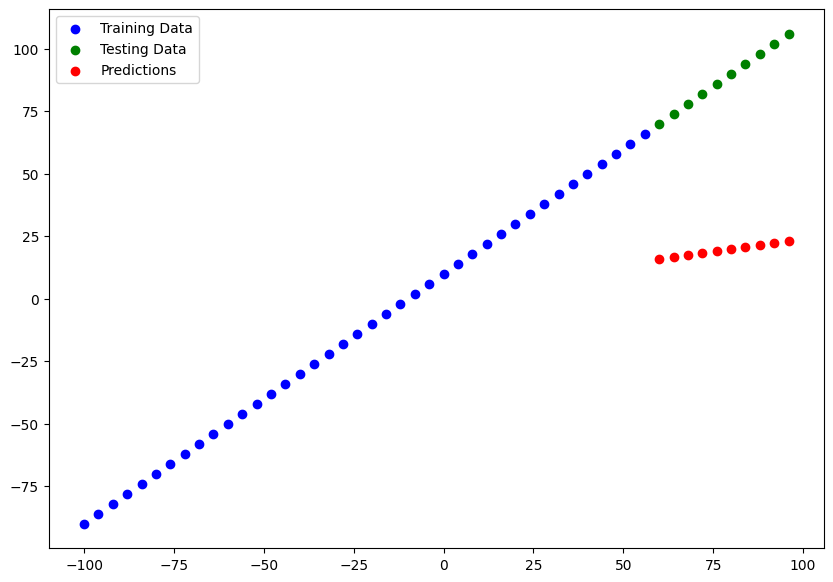

In [ ]:
# Make and Plot predictions for Model_3

# Make some predictions
y_pred_3 = model_3.predict(X_test)

# Plotting the predictions
plot_predictions(predictions=y_pred_3)

In [ ]:
# Evaluate predictions using the metrics for Model_3

mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)

mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.53892>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4783.749>)

### Model_4 Experiment:

In [ ]:
# Creating a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
], name="Model_4")

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
              metrics=["mae"])

# 3. Lets fit the model to the training data
model_4.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=50, verbose=0)

1/1 [==============================] - 0s 76ms/step


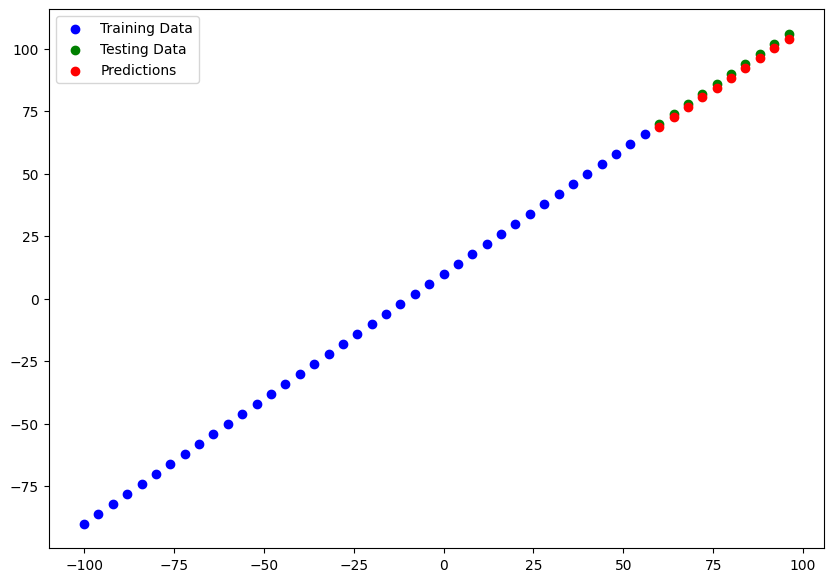

In [ ]:
# Make and Plot predictions for Model_4

# Make some predictions
y_pred_4 = model_4.predict(X_test)

# Plotting the predictions
plot_predictions(predictions=y_pred_4)

In [ ]:
# Evaluate predictions using the metrics for Model_4

mae_4 = mae(y_test, y_pred_4)
mse_4 = mse(y_test, y_pred_4)

mae_4, mse_4

(<tf.Tensor: shape=(), dtype=float32, numpy=1.5538597>,
 <tf.Tensor: shape=(), dtype=float32, numpy=2.4873478>)

## Comparing the results of the experiments:

In [ ]:
# Let's compare the model's results using the panda's dataframe
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()],
                 ["model_4", mae_4.numpy(), mse_4.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,21.310787,457.598389
1,model_2,10.690886,122.118149
2,model_3,68.538918,4783.749023
3,model_4,1.553860,2.487348


# Saving our Models

Saving our model allows us to use them outside Google colab such as in a web application or a mobile app.

There are two main formats we can save our models:
1. The SavedModel format
2. The HDF5 format

In [ ]:
# Save model using the SavedModel format

model_4.save("number_prediction_model_SavedModelFormat")

In [ ]:
# Save model using the HDF5 format

model_4.save("number_prediction_model_HDF5_Format.h5")

## Loading a saved model

In [ ]:
# Load in the SavedModel Format model

loaded_SavedModel_format = tf.keras.models.load_model("/content/number_prediction_model_SavedModelFormat")
loaded_SavedModel_format.summary()

Model: "Model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 1)                 2         
                                                                 
 dense_20 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compare model_4 predictions with savedModel model predictions

model_4_preds = model_4.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)

model_4_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 53ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Load the model using the h5 format

loaded_h5_model = tf.keras.models.load_model("/content/number_prediction_model_HDF5_Format.h5")
loaded_h5_model.summary()

Model: "Model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 1)                 2         
                                                                 
 dense_20 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compare model_4 predictions with h5 model predictions

model_4_h5_preds = model_4.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)

model_4_h5_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 50ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model (or any other file) from Google Colab

If you want to download your files from Google Colab:
1. You can go to the "files" tab and right click on the file and click 'download'
2. Use Code (as below)
3. Save it to google drive by connecting to google drive and copying it there (see 2nd code cell)

In [ ]:
# Download a file from google colab

# from google.colab import files
# files.download("PATH")

In [ ]:
# Saving a file from Google Colab to Google Drive (requries mounting Google Drive)

# First mount the google drive
# There should a folder for drive coming up in the files
# That folder should have a place where we want to copy the file to - DRIVE_PATH
# The Model File/Folder that I want to copy in the drive - MODEL_PATH

# Copy Code
# !cp MODEL_PATH DRIVE_PATH

# Lisiting Code
# !ls DRIVE_PATH

# **A Larger Example**

In [ ]:
# Import the required libraries

import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read in the insurance dataset

insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# Trying to one hot encode the dataset so that its all numbers

insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Create X and y values (features and labels)

X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [ ]:
# View X

X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
# View y

y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
# Create Training and Test Set
# scikitlean train test split - popular function to create training and train set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test), len(y), len(y_train), len(y_test)

(1338, 1070, 268, 1338, 1070, 268)

In [ ]:
# Build a neural network

tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                        metrics=["mae"])

# 3. Fit the model
history = insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 2s 3ms/step - loss: 8853.4688 - mae: 8853.4688
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 7088.1875 - mae: 7088.1875
Epoch 3/100
34/34 [==============================] - 0s 4ms/step - loss: 6408.6914 - mae: 6408.6914
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 5946.4429 - mae: 5946.4429
Epoch 5/100
34/34 [==============================] - 0s 5ms/step - loss: 5258.4888 - mae: 5258.4888
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 4265.7808 - mae: 4265.7808
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 3921.3010 - mae: 3921.3010
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 4089.7097 - mae: 4089.7097
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 3920.9004 - mae: 3920.9004
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 3789.4419 - mae: 3789.4419

In [ ]:
# Check the results of insurance model on test data

insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3260.8347 - mae: 3260.8347


[3260.834716796875, 3260.834716796875]

Text(0.5, 0, 'epochs')

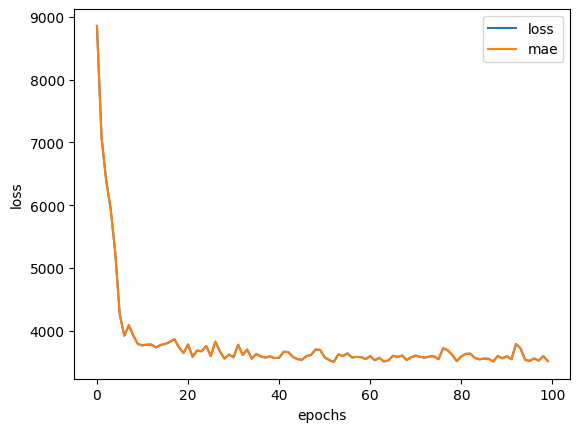

In [ ]:
# Plot history (also known as a loss curve or a training curve)

pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### Preprocessing Data (Normalization and Standardization)

In terms of scaling values, neural networks tend to prefer normalization.

If you are not sure on what to use, you can try both to see which performs better.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# To prepare the data, classes are imported from scikitlearn

from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),   # turn all values in these columns between 0 and 1 for normalization
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X and y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Create the Train and Test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to the training data
ct.fit(X_train)

# Transform the training and test data with normalization (MinMaxScalar) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
# Data visualization as of now

X_train_normal, X_train_normal.shape

(array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
         0.        ],
        [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
         0.        ],
        ...,
        [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
         1.        ],
        [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
         1.        ]]),
 (1070, 11))

In [ ]:
# Build a neural network

tf.random.set_seed(42)

# 1. Create a model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                        metrics=["mae"])

# 3. Fit the model
history_2 = insurance_model_2.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 10494.8896 - mae: 10494.8896
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 6825.1006 - mae: 6825.1006
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 4147.2661 - mae: 4147.2661
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 3656.0527 - mae: 3656.0527
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 3579.2822 - mae: 3579.2822
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 3618.1956 - mae: 3618.1956
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 3549.7004 - mae: 3549.7004
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 3588.9146 - mae: 3588.9146
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 3558.5188 - mae: 3558.5188
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 3581.6748 - mae: 3581.67

In [ ]:
# Check the results of insurance model on test data

insurance_model_2.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3174.0598 - mae: 3174.0598


[3174.059814453125, 3174.059814453125]

Text(0.5, 0, 'epochs')

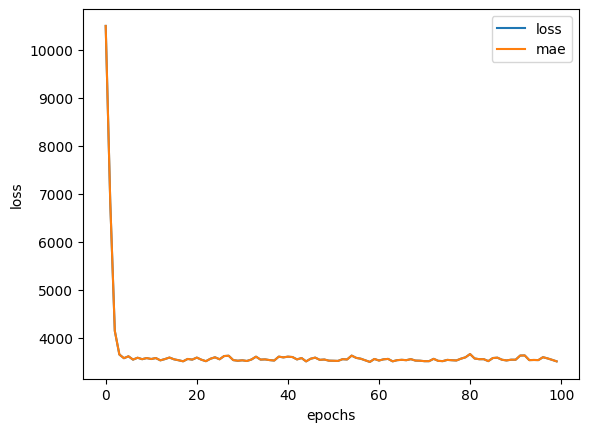

In [ ]:
# Plot history (also known as a loss curve or a training curve)

pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")